**Sólo variables Chi-cuadrada**

**Librerías**

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import numpy as np

**Variables y grado su grado de relación**

In [1]:
# Grados de relación (estas relaciones fueron calculadas en Rstudio con el test de Chi-cuadrada)
# Nota: Estos valores son la representación de la V de Cramer, 
# de estas variables respecto a la variable dependiente (Dicha o felicidad posterior al consumo y por causa del mismo)
grados_relacion = {
    "exper_perdida_si_mismo": 0.204468693973438,
    "practica_yoga_previa": 0.196297440467842,
    "vivencia_mistica_previa": 0.243298236072819,
    "exper_mov_involuntarios": 0.18575571859901,
    "exper_muerte": 0.179708924371968,
    "practica_respiracion_previa": 0.179665406540291
}

# Nombre de la variable dependiente
variable_dependiente = "Sensación de dicha"

# Opcional: cambiar nombres de las variables
nombre_variables = {
    "exper_perdida_si_mismo": "Exp. de pérdida de sí mismo",
    "practica_yoga_previa": "Práct. previa de Yoga",
    "vivencia_mistica_previa": "Vivencia(s) mística(s) previa(s)",
    "exper_mov_involuntarios": "Exp. de movimientos involuntarios",
    "exper_muerte": "Exp. de sensación vinculada con muerte",
    "practica_respiracion_previa": "Práct. de respiración previa"
}

**Grafo**

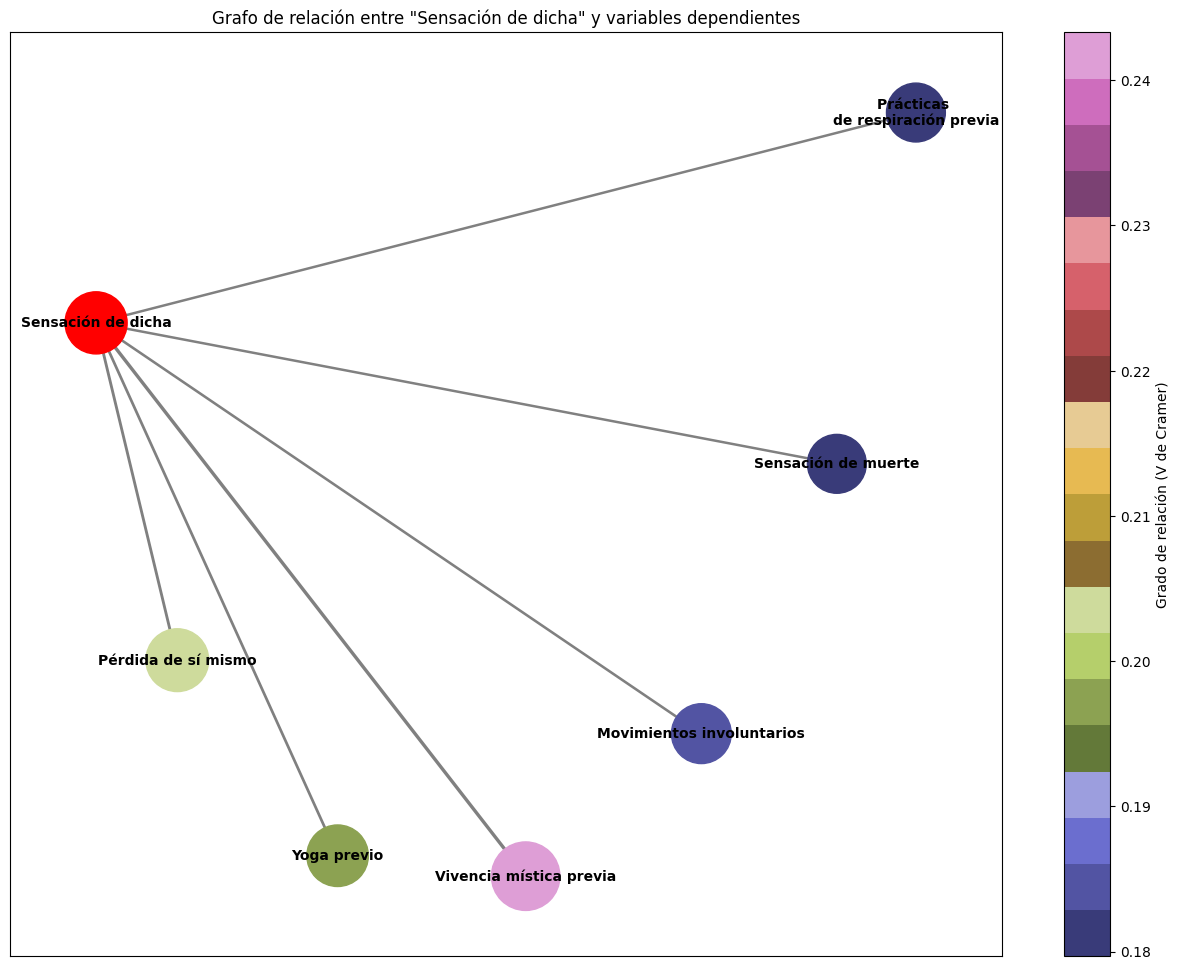

In [74]:
# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000)

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    G.add_node(nombre_var, color='blue', size=grado * 1000)
    G.add_edge(variable_dependiente, nombre_var, weight=grado * 10)

# Obtener colores y tamaños de los nodos
node_colors = [grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) if node != variable_dependiente else None for node in G.nodes]
node_sizes = [2000 if node == variable_dependiente else grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) * 10000 for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Obtener grosores de los enlaces
weights = [G[u][v]['weight'] for u, v in G.edges]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_normalized, cmap=plt.cm.viridis)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre es largo
node_labels = {node: node if len(node) <= 25 else '\n'.join([node[:10], node[10:]]) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables dependientes')
plt.show()

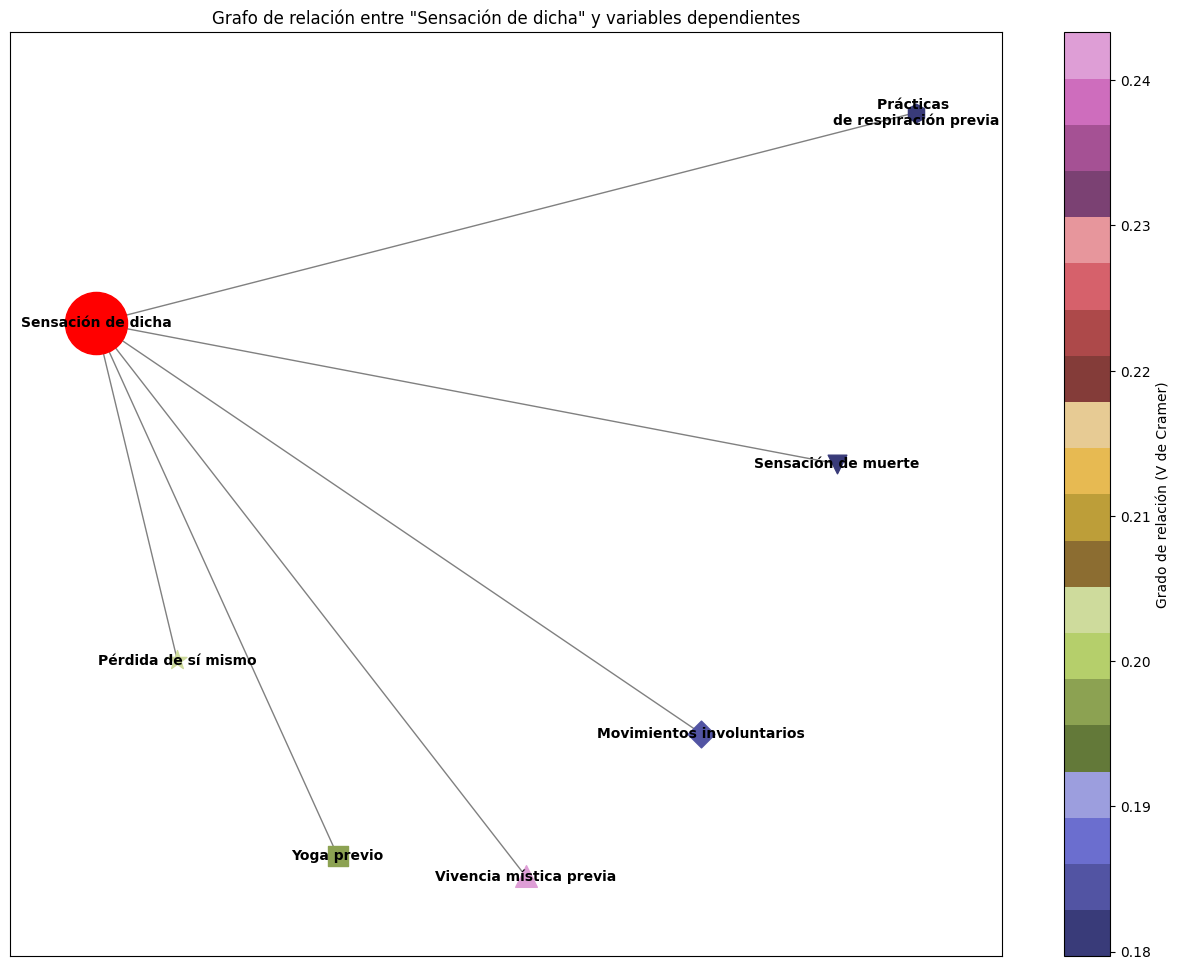

In [97]:
# Formas de los nodos
formas_nodos = {
    "Pérdida de sí mismo": '*',                   # Estrella
    "Yoga previo": 's',                           # Cuadrado
    "Vivencia mística previa": '^',               # Triángulo arriba
    "Movimientos involuntarios": 'D',             # Diamante
    "Sensación de muerte": 'v',                   # Triángulo abajo
    "Prácticas de respiración previa": 'h'        # Hexágono
}

# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000, shape='o')  # Nodo principal como un círculo

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    shape = formas_nodos.get(nombre_var, 'o')  # Usar la forma definida o círculo por defecto
    G.add_node(nombre_var, color=grado, size=grado * 1000, shape=shape)
    G.add_edge(variable_dependiente, nombre_var)

# Obtener colores y tamaños de los nodos
node_colors = [G.nodes[node]['color'] if node != variable_dependiente else None for node in G.nodes]
node_sizes = [G.nodes[node]['size'] for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos con diferentes formas
for shape in set(formas_nodos.values()).union({'o'}):  # Incluir la forma 'o' por defecto
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=[node for node in G.nodes if G.nodes[node]['shape'] == shape],
                           node_size=[G.nodes[node]['size'] for node in G.nodes if G.nodes[node]['shape'] == shape],
                           node_color=[node_colors_normalized[i] for i, node in enumerate(G.nodes) if G.nodes[node]['shape'] == shape],
                           cmap=plt.cm.tab20b, node_shape=shape)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre es largo
node_labels = {node: node if len(node) <= 25 else '\n'.join([node[:10], node[10:]]) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables dependientes')
plt.show()

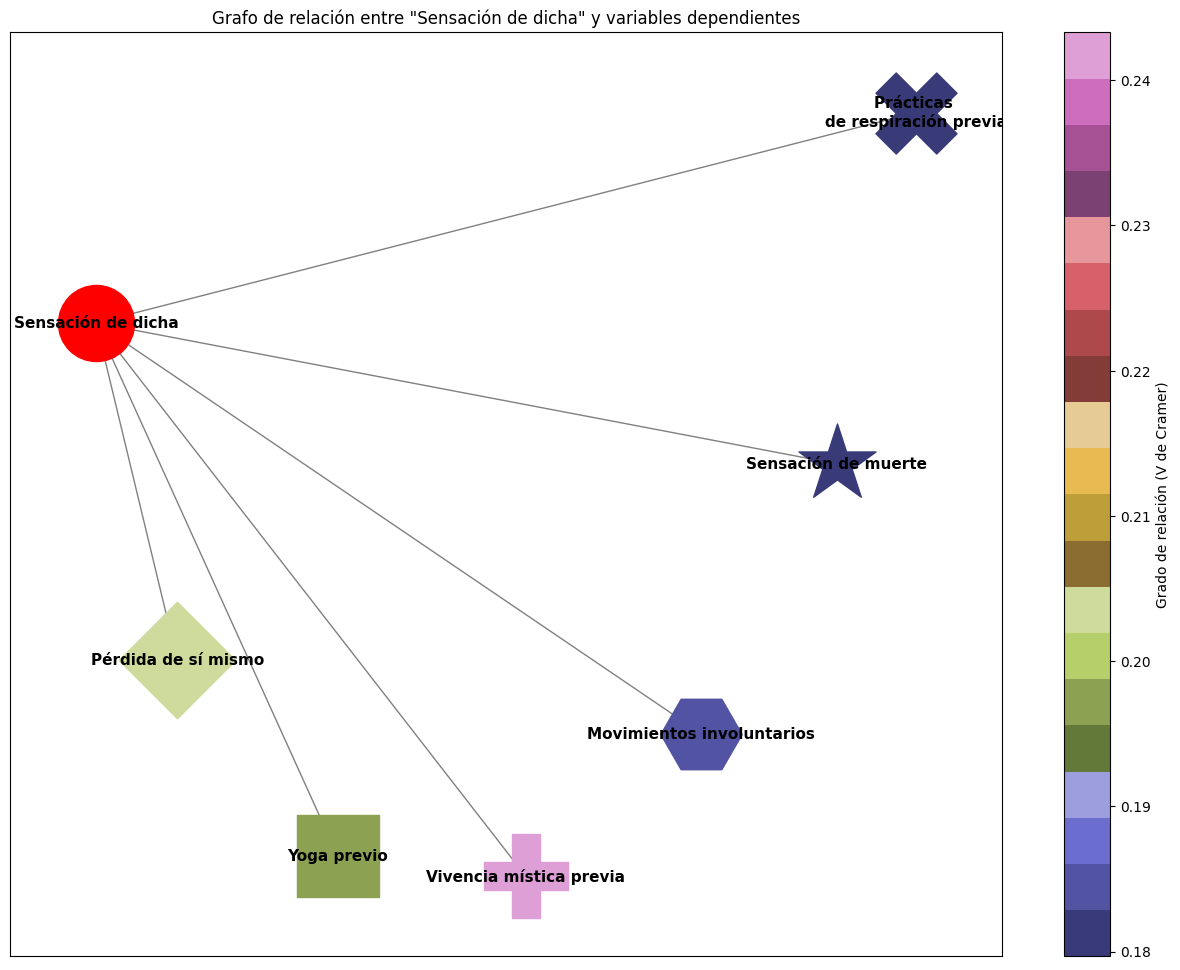

In [107]:
# Formas de los nodos
formas_nodos = {
    "Pérdida de sí mismo": 'D',                   # Estrella
    "Yoga previo": 's',                           # Cuadrado
    "Vivencia mística previa": 'P',               # Triángulo arriba
    "Movimientos involuntarios": 'H',             # Diamante
    "Sensación de muerte": '*',                   # Triángulo abajo
    "Prácticas de respiración previa": 'X'        # Hexágono
}

# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=3000, shape='o')  # Nodo principal como un círculo más grande

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    shape = formas_nodos.get(nombre_var, 'o')  # Usar la forma definida o círculo por defecto
    G.add_node(nombre_var, color=grado, size=(grado + 0.5) * 5000, shape=shape)  # Ajustar el tamaño para que sean más grandes
    G.add_edge(variable_dependiente, nombre_var)

# Obtener colores y tamaños de los nodos
node_colors = [G.nodes[node]['color'] if node != variable_dependiente else None for node in G.nodes]
node_sizes = [G.nodes[node]['size'] for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos con diferentes formas
for shape in set(formas_nodos.values()).union({'o'}):  # Incluir la forma 'o' por defecto
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=[node for node in G.nodes if G.nodes[node]['shape'] == shape],
                           node_size=[G.nodes[node]['size'] for node in G.nodes if G.nodes[node]['shape'] == shape],
                           node_color=[node_colors_normalized[i] for i, node in enumerate(G.nodes) if G.nodes[node]['shape'] == shape],
                           cmap=plt.cm.tab20b, node_shape=shape)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre es largo
node_labels = {node: node if len(node) <= 25 else '\n'.join([node[:10], node[10:]]) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=11, font_weight='bold')

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables dependientes')
plt.show()

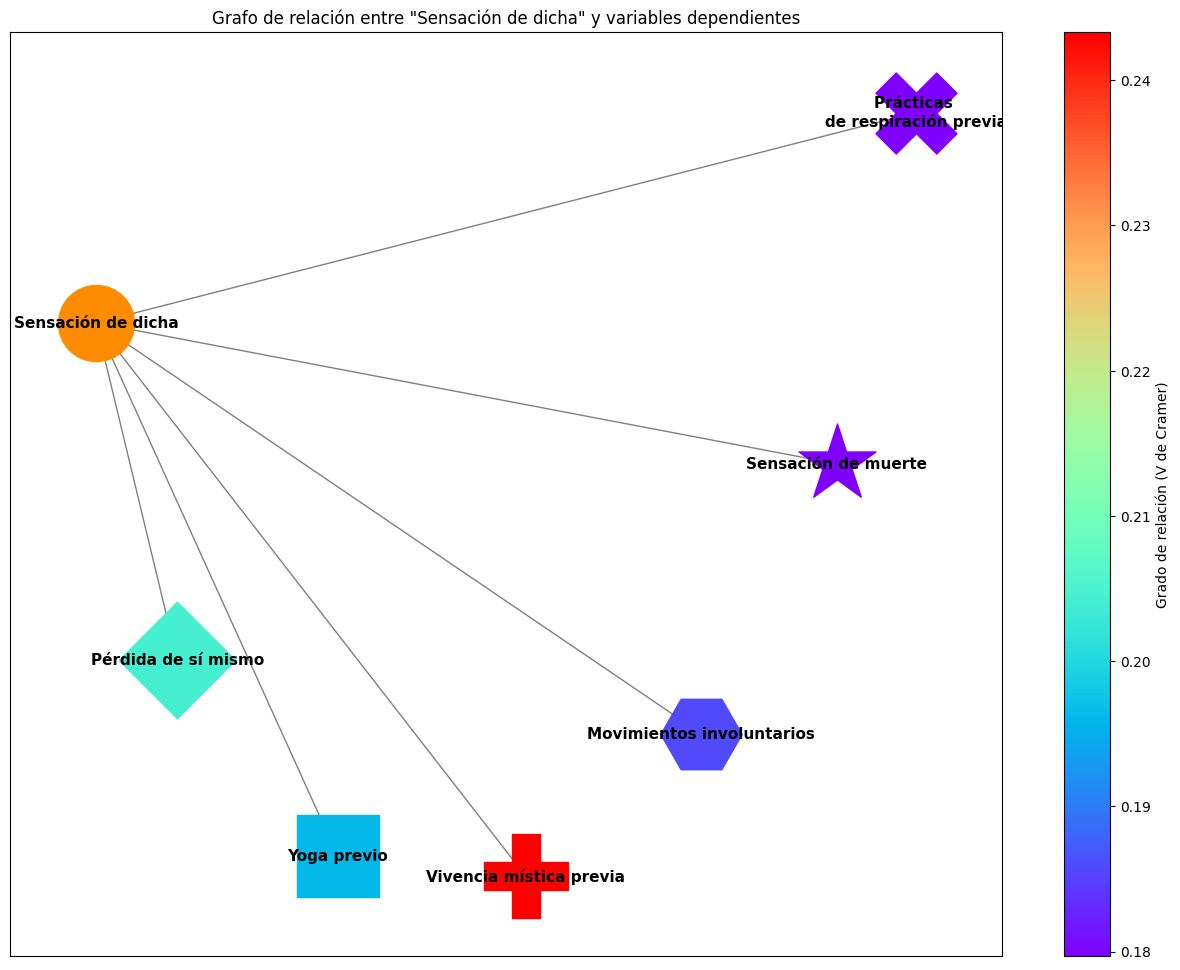

In [111]:
# Formas de los nodos
formas_nodos = {
    "Pérdida de sí mismo": 'D',                   # Estrella
    "Yoga previo": 's',                           # Cuadrado
    "Vivencia mística previa": 'P',               # Triángulo arriba
    "Movimientos involuntarios": 'H',             # Diamante
    "Sensación de muerte": '*',                   # Triángulo abajo
    "Prácticas de respiración previa": 'X'        # Hexágono
}

# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=3000, shape='o')  # Nodo principal como un círculo más grande

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    shape = formas_nodos.get(nombre_var, 'o')  # Usar la forma definida o círculo por defecto
    G.add_node(nombre_var, color=grado, size=(grado + 0.5) * 5000, shape=shape)  # Ajustar el tamaño para que sean más grandes
    G.add_edge(variable_dependiente, nombre_var)

# Obtener colores y tamaños de los nodos
node_colors = [G.nodes[node]['color'] if node != variable_dependiente else None for node in G.nodes]
node_sizes = [G.nodes[node]['size'] for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.rainbow)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.rainbow(norm(color)) if color is not None else 'darkorange' for color in node_colors]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos con diferentes formas
for shape in set(formas_nodos.values()).union({'o'}):  # Incluir la forma 'o' por defecto
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=[node for node in G.nodes if G.nodes[node]['shape'] == shape],
                           node_size=[G.nodes[node]['size'] for node in G.nodes if G.nodes[node]['shape'] == shape],
                           node_color=[node_colors_normalized[i] for i, node in enumerate(G.nodes) if G.nodes[node]['shape'] == shape],
                           cmap=plt.cm.tab20b, node_shape=shape)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre es largo
node_labels = {node: node if len(node) <= 25 else '\n'.join([node[:10], node[10:]]) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=11, font_weight='bold')

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables dependientes')
plt.show()

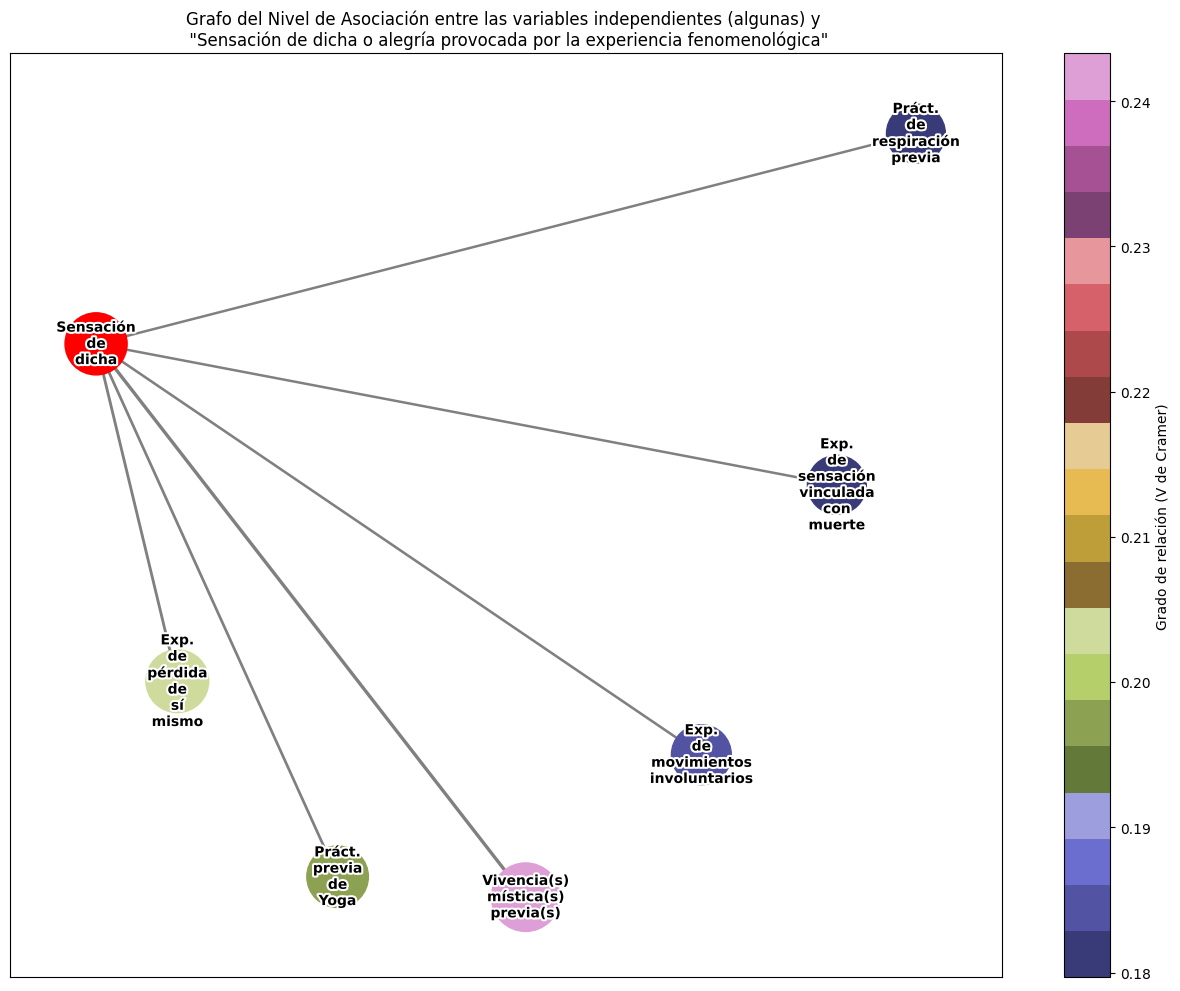

In [5]:
import matplotlib.patheffects as path_effects

# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000)

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    G.add_node(nombre_var, color='blue', size=grado * 1000)
    G.add_edge(variable_dependiente, nombre_var, weight=grado * 10)

# Obtener colores y tamaños de los nodos
node_colors = [grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) if node != variable_dependiente else None for node in G.nodes]
node_sizes = [2000 if node == variable_dependiente else grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) * 10000 for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Obtener grosores de los enlaces
weights = [G[u][v]['weight'] for u, v in G.edges]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_normalized, cmap=plt.cm.viridis)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre contiene un espacio
def dividir_nombre(nombre):
    return nombre.replace(' ', '\n')

node_labels = {node: dividir_nombre(node) for node in G.nodes}

# Dibujar las etiquetas con un halo blanco
for node, (x, y) in pos.items():
    label = node_labels[node]
    text = ax.text(x, y, label, fontsize=10, fontweight='bold', ha='center', va='center', color='black')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()])

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo del Nivel de Asociación entre las variables independientes (algunas) y \n "Sensación de dicha o alegría provocada por la experiencia fenomenológica"')
plt.show()

**Variables Chi-cuadrada más Fisher**

In [2]:
# Grados de relación (estas relaciones fueron calculadas en Rstudio con el test de Chi-cuadrada)
# Nota: Estos valores son la representación de la V de Cramer, 
# de estas variables respecto a la variable dependiente (Dicha o felicidad posterior al consumo y por causa del mismo)
grados_relacion = {
    "exper_perdida_si_mismo": 0.204468693973438,
    "practica_yoga_previa": 0.196297440467842,
    "vivencia_mistica_previa": 0.243298236072819,
    "exper_mov_involuntarios": 0.18575571859901,
    "exper_muerte": 0.179708924371968,
    "practica_respiracion_previa": 0.179665406540291,
    "cambio_naturaleza": 0.316182718238951, #A partir de aquí, son variables FISHER
    "cambio_de_decisión": 0.324405821690151,
    "Nivel_satisfac_antes": 0.291576787230146,
    "Estabilidad_animo": 0.345129036797548,
    "Relaciones_sociales": 0.273412250773294,
    "Empat_compasion": 0.38156162790101
    
}

# Nombre de la variable dependiente
variable_dependiente = "Sensación de dicha"

# Opcional: cambiar nombres de las variables
nombre_variables = {
    "exper_perdida_si_mismo": "Pérdida de sí mismo",
    "practica_yoga_previa": "Yoga previo",
    "vivencia_mistica_previa": "Vivencia mística previa",
    "exper_mov_involuntarios": "Movimientos involuntarios",
    "exper_muerte": "Sensación de muerte",
    "practica_respiracion_previa": "Prácticas de respiración previa",
    "cambio_naturaleza": "Conexión con la naturaleza",
    "cambio_de_decisión": "Decisión importante",
    "Nivel_satisfac_antes": "Nivel de satisfacción anterior",
    "Estabilidad_animo": "Estabilidad de ánimo",
    "Relaciones_sociales": "Relaciones sociales",
    "Empat_compasion": "Empatía y compasión"
}

**Grafo**

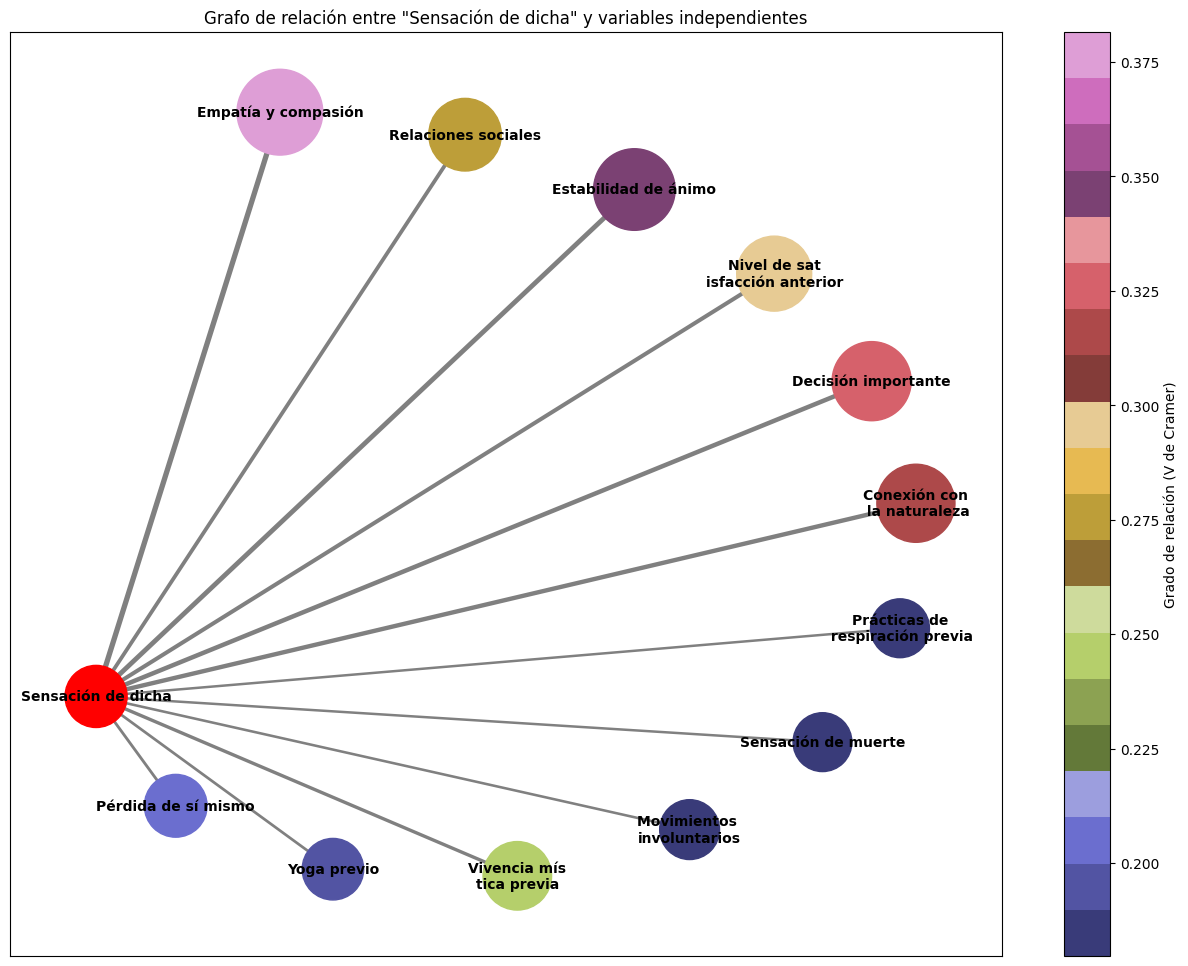

In [16]:
# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000)

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    G.add_node(nombre_var, color='blue', size=grado * 1000)
    G.add_edge(variable_dependiente, nombre_var, weight=grado * 10)

# Obtener colores y tamaños de los nodos
node_colors = [grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) if node != variable_dependiente else None for node in G.nodes]
node_sizes = [2000 if node == variable_dependiente else grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) * 10000 for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Obtener grosores de los enlaces
weights = [G[u][v]['weight'] for u, v in G.edges]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_normalized, cmap=plt.cm.viridis)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre es largo
node_labels = {node: node if len(node) <= 20 else '\n'.join([node[:12], node[12:]]) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables independientes')
plt.show()

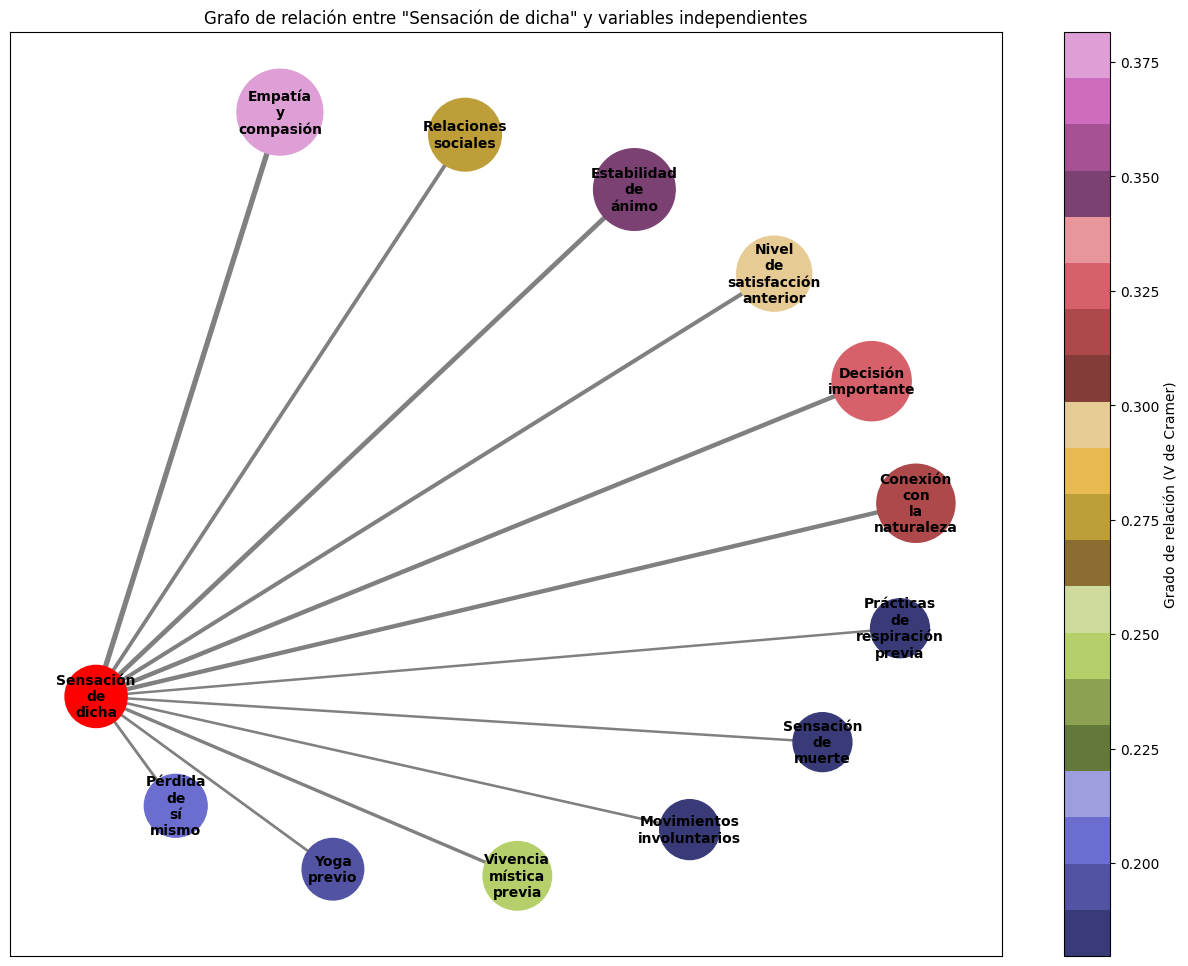

In [17]:
# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000)

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    G.add_node(nombre_var, color='blue', size=grado * 1000)
    G.add_edge(variable_dependiente, nombre_var, weight=grado * 10)

# Obtener colores y tamaños de los nodos
node_colors = [grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) if node != variable_dependiente else None for node in G.nodes]
node_sizes = [2000 if node == variable_dependiente else grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) * 10000 for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Obtener grosores de los enlaces
weights = [G[u][v]['weight'] for u, v in G.edges]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_normalized, cmap=plt.cm.viridis)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre contiene un espacio
def dividir_nombre(nombre):
    return nombre.replace(' ', '\n')

node_labels = {node: dividir_nombre(node) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables independientes')
plt.show()

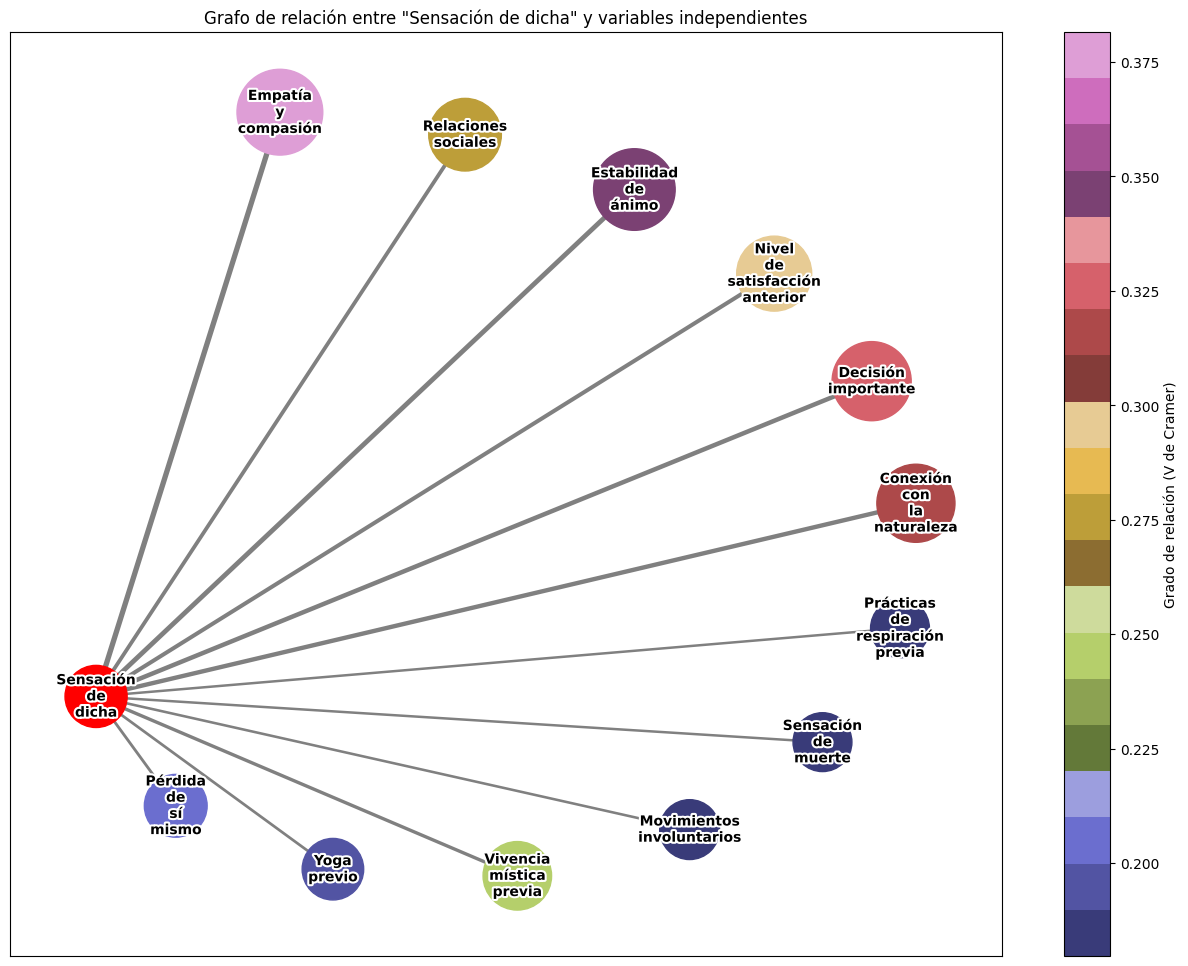

In [18]:
import matplotlib.patheffects as path_effects

# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000)

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    G.add_node(nombre_var, color='blue', size=grado * 1000)
    G.add_edge(variable_dependiente, nombre_var, weight=grado * 10)

# Obtener colores y tamaños de los nodos
node_colors = [grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) if node != variable_dependiente else None for node in G.nodes]
node_sizes = [2000 if node == variable_dependiente else grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) * 10000 for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Obtener grosores de los enlaces
weights = [G[u][v]['weight'] for u, v in G.edges]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_normalized, cmap=plt.cm.viridis)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre contiene un espacio
def dividir_nombre(nombre):
    return nombre.replace(' ', '\n')

node_labels = {node: dividir_nombre(node) for node in G.nodes}

# Dibujar las etiquetas con un halo blanco
for node, (x, y) in pos.items():
    label = node_labels[node]
    text = ax.text(x, y, label, fontsize=10, fontweight='bold', ha='center', va='center', color='black')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()])

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables independientes')
plt.show()

**Utilizando los p-valores como los valores representativos de la relación**

In [2]:
# Grados de relación (estas relaciones fueron calculadas en Rstudio con el test de Chi-cuadrada)
# Nota: Estos valores son la representación de la V de Cramer, 
# de estas variables respecto a la variable dependiente (Dicha o felicidad posterior al consumo y por causa del mismo)
grados_relacion = {
    "exper_perdida_si_mismo": 0.204468693973438,
    "practica_yoga_previa": 0.196297440467842,
    "vivencia_mistica_previa": 0.243298236072819,
    "exper_mov_involuntarios": 0.18575571859901,
    "exper_muerte": 0.179708924371968,
    "practica_respiracion_previa": 0.179665406540291,
    "cambio_naturaleza": 0.316182718238951, #A partir de aquí, son variables FISHER
    "cambio_de_decisión": 0.324405821690151,
    "Nivel_satisfac_antes": 0.291576787230146,
    "Estabilidad_animo": 0.345129036797548,
    "Relaciones_sociales": 0.273412250773294,
    "Empat_compasion": 0.38156162790101
    
}

# Nombre de la variable dependiente
variable_dependiente = "Sensación de dicha"

# Opcional: cambiar nombres de las variables
nombre_variables = {
    "exper_perdida_si_mismo": "Pérdida de sí mismo",
    "practica_yoga_previa": "Yoga previo",
    "vivencia_mistica_previa": "Vivencia mística previa",
    "exper_mov_involuntarios": "Movimientos involuntarios",
    "exper_muerte": "Sensación de muerte",
    "practica_respiracion_previa": "Prácticas de respiración previa",
    "cambio_naturaleza": "Conexión con la naturaleza",
    "cambio_de_decisión": "Decisión importante",
    "Nivel_satisfac_antes": "Nivel de satisfacción anterior",
    "Estabilidad_animo": "Estabilidad de ánimo",
    "Relaciones_sociales": "Relaciones sociales",
    "Empat_compasion": "Empatía y compasión"
}

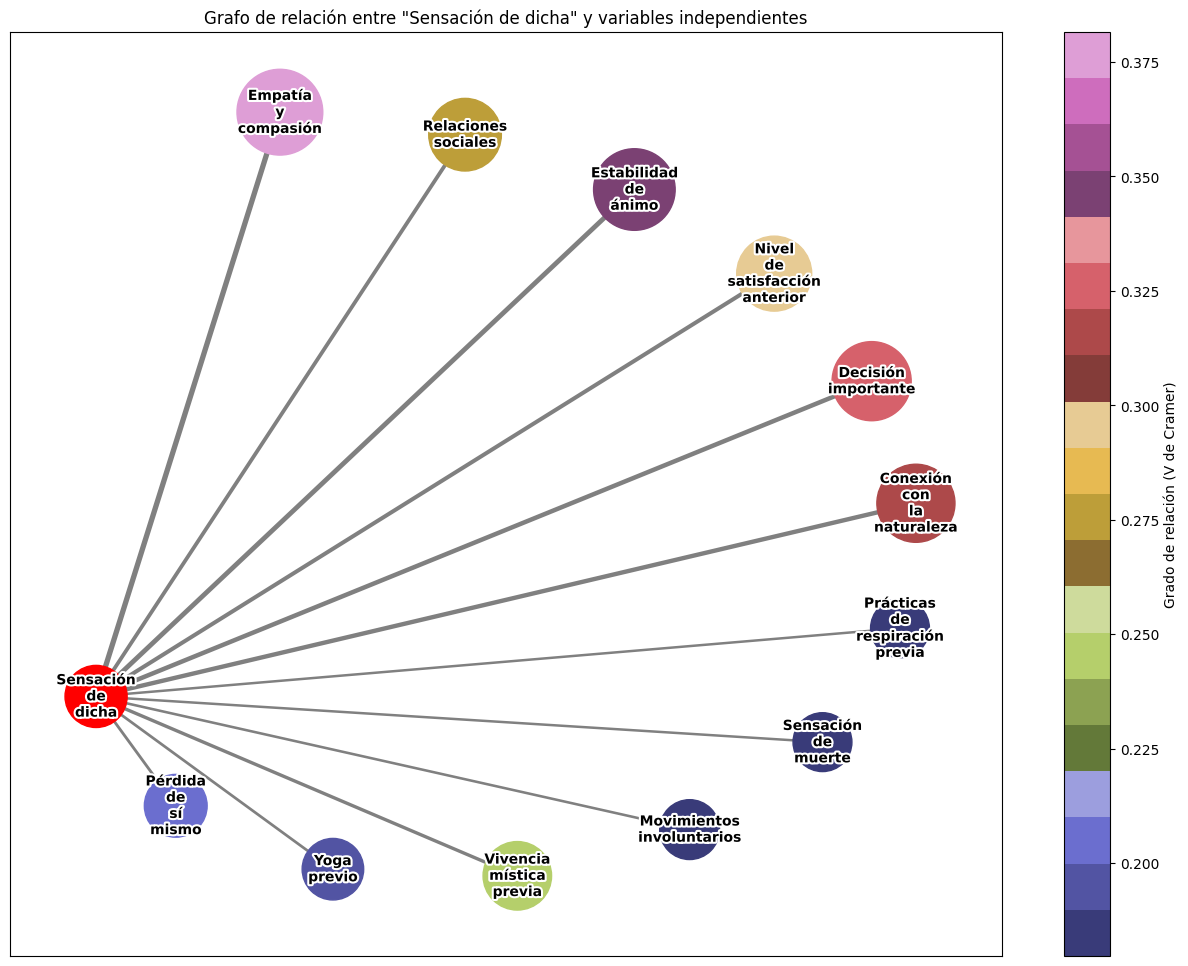

In [18]:
import matplotlib.patheffects as path_effects

# Crear el grafo
G = nx.Graph()

# Agregar nodo de la variable dependiente
G.add_node(variable_dependiente, color='#FF0000', size=2000)

# Agregar nodos y enlaces
for var, grado in grados_relacion.items():
    nombre_var = nombre_variables.get(var, var)  # Usar nombre personalizado si está disponible
    G.add_node(nombre_var, color='blue', size=grado * 1000)
    G.add_edge(variable_dependiente, nombre_var, weight=grado * 10)

# Obtener colores y tamaños de los nodos
node_colors = [grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) if node != variable_dependiente else None for node in G.nodes]
node_sizes = [2000 if node == variable_dependiente else grados_relacion.get(list(nombre_variables.keys())[list(nombre_variables.values()).index(node)], 0) * 10000 for node in G.nodes]

# Normalizar los colores de los nodos, excluyendo la variable dependiente
norm = mcolors.Normalize(vmin=min(filter(None, node_colors)), vmax=max(filter(None, node_colors)))
sm = ScalarMappable(norm=norm, cmap=plt.cm.tab20b)
sm.set_array(list(filter(None, node_colors)))
node_colors_normalized = [plt.cm.tab20b(norm(color)) if color is not None else '#FF0000' for color in node_colors]

# Obtener grosores de los enlaces
weights = [G[u][v]['weight'] for u, v in G.edges]

# Dibujar el grafo
pos = nx.spiral_layout(G, center=(9, 10), resolution=1, equidistant=True)
fig, ax = plt.subplots(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_normalized, cmap=plt.cm.viridis)

# Dibujar los enlaces
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Dibujar las etiquetas de los nodos, dividiendo en dos líneas si el nombre contiene un espacio
def dividir_nombre(nombre):
    return nombre.replace(' ', '\n')

node_labels = {node: dividir_nombre(node) for node in G.nodes}

# Dibujar las etiquetas con un halo blanco
for node, (x, y) in pos.items():
    label = node_labels[node]
    text = ax.text(x, y, label, fontsize=10, fontweight='bold', ha='center', va='center', color='black')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()])

# Agregar una barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Grado de relación (V de Cramer)')

# Agregar un título a la gráfica
plt.title('Grafo de relación entre "Sensación de dicha" y variables independientes')
plt.show()

In [ ]:
# Formas de los nodos
formas_nodos = {
    "Pérdida de sí mismo": 'o',                   # Círculo
    "Yoga previo": 's',                           # Cuadrado
    "Vivencia mística previa": '^',               # Triángulo arriba
    "Movimientos involuntarios": 'D',             # Diamante
    "Sensación de muerte": 'v',                   # Triángulo abajo
    "Prácticas de respiración previa": 'h',        # Hexágono
    "Meditación previa": 'p',                     # Pentágono
    "Visualización creativa previa": 'X',         # Cruz
    "Recuerdos traumáticos": '+',                 # Cruz diagonal
    "Prácticas de concentración previa": '8',     # Punto de ocho
    "Experiencias extracorpóreas previas": 'd',   # Deltoide
    "Manifestación de energía previa": '*',       # Asterisco
    "Experiencia de unidad cósmica": 'H',         # Hache
    "Sanación energética previa": 'P',            # Estrella de cinco puntas
    "Estado de iluminación previo": 'X',          # Cruz
    "Fenómenos de sincronicidad": 'o',            # Círculo
    "Estados de consciencia alterados": 's',      # Cuadrado
    "Prácticas de atención plena previa": '^',    # Triángulo arriba
    "Experiencia de conexión espiritual": 'D',    # Diamante
    "Fases de expansión de consciencia": 'v',     # Triángulo abajo
    "Prácticas de desarrollo personal": 'h'       # Hexágono
}
